<a href="https://colab.research.google.com/github/BladyBoy/OASIS-INFOBYTE/blob/main/Task-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3:- Car Price Prediction With Machine Learning

Source Code:

In [9]:
#Loading the data by using the raw CSV file stored in github
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/BladyBoy/OASIS-INFOBYTE/main/Task-3/car%20data.csv')

# Display the first few rows of the dataframe
print(df.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


Preprocessing

In [10]:
# Check for null values
print(df.isnull().sum())

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Check the new dataframe
print(df_encoded.head())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Owner  \
0     ritz  2014           3.35           5.59       27000      0   
1      sx4  2013           4.75           9.54       43000      0   
2     ciaz  2017           7.25           9.85        6900      0   
3  wagon r  2011           2.85           4.15        5200      0   
4    swift  2014           4.60           6.87       42450      0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  \
0             False              True                    False   
1              True             False                    False   
2             False              True                    False   
3             False              True                    False   
4              True             False                    False   

   T

Visualization of the data

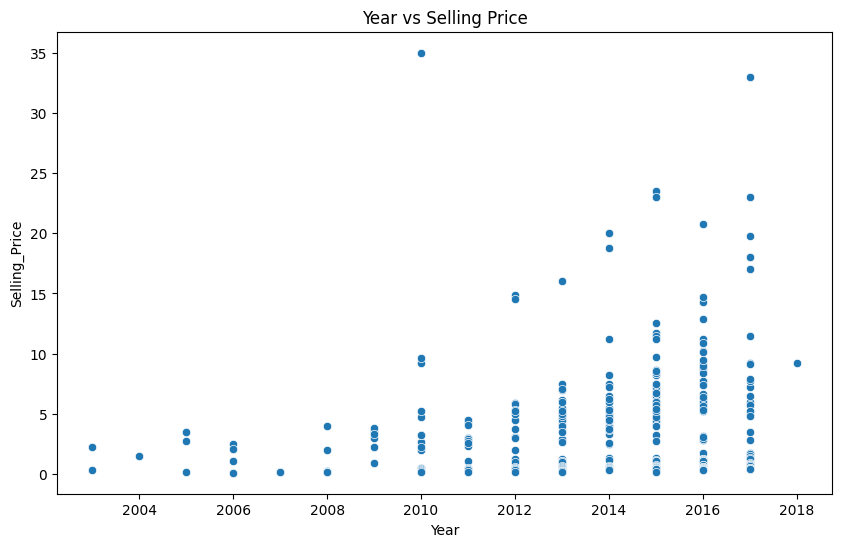

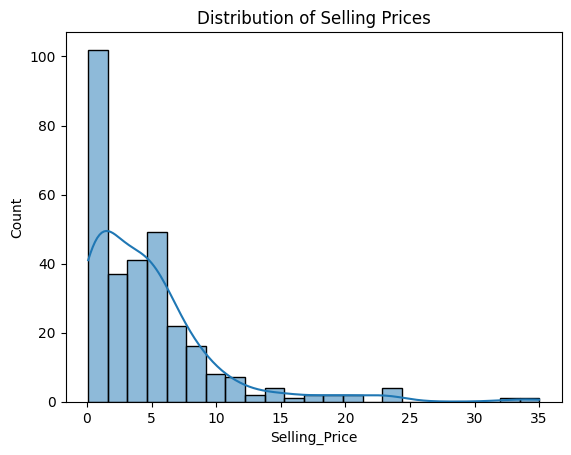

In [11]:
# Visualizing the relationship between Year and Selling_Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.title('Year vs Selling Price')
plt.show()

# Distribution of Selling Price
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.show()


In [13]:
# Define features and target variable
X = df_encoded.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df_encoded['Selling_Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Preparing the data for training

Training the Model

In [14]:
# Creating the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)


Mean Squared Error: 3.4813498305146187
Root Mean Squared Error: 1.865837568094988
R2 Score: 0.8488707839191938


Visualizing the Model Performance

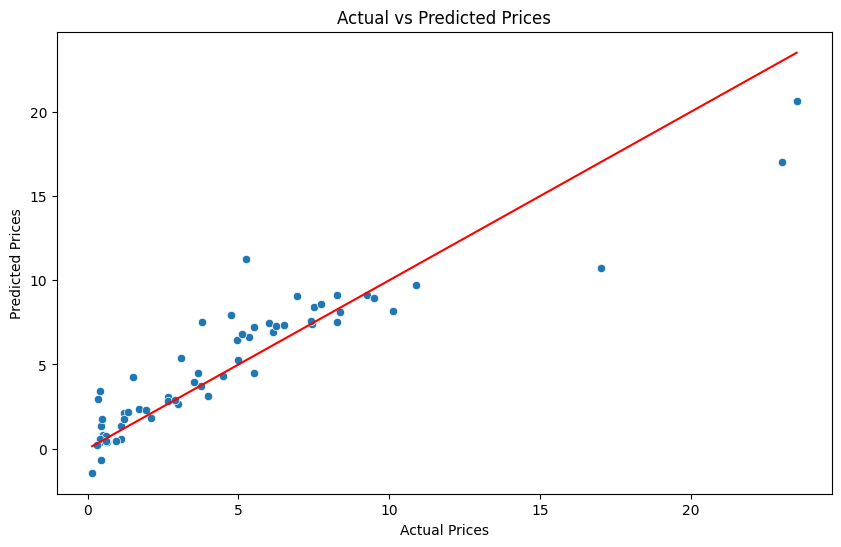

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)  # Specify the parameters by name
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Plotting the line of perfect prediction
plt.show()

